### Crude Oil Spot Prices - Data Exercise Week 2
<div>
  <p>
    Name: Oscar Jaimes<br />
    ID: 1576326<br />
    Course: ECON366<br />
  </p>
</div>

#### Fetch Data & Setup Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import requests
from io import BytesIO
from matplotlib import pyplot as plt
from datetime import datetime

DATA_URL = 'https://www.eia.gov/dnav/pet/xls/PET_PRI_SPT_S1_D.xls'
price_data = None

# fetch up-to-date data from EIA and load it into pandas dataframe
response = requests.get(DATA_URL)
with BytesIO(response.content) as bio:
    price_data = pd.read_excel(
      bio, 
      sheet_name="Data 1",
      skiprows=range(2)
    )

# rename columns
price_data.columns = ['date', 'wti', 'brent']

# visualize the data
price_data.tail(10)


,date,wti,brent
9635,2023-08-23,78.91,83.94
9636,2023-08-24,79.52,84.07
9637,2023-08-25,80.47,85.42
9638,2023-08-28,80.65,NaN
9639,2023-08-29,81.14,86.37
9640,2023-08-30,81.64,86.62
9641,2023-08-31,83.55,87.29
9642,2023-09-01,85.52,89.98
9643,2023-09-04,NaN,90.42
9644,2023-09-05,86.74,91.25


#### Convert Data From Wide To Long

In [2]:
price_data = price_data.melt(
  id_vars=['date'],
  value_vars=['wti', 'brent'],
  var_name='crude_stream',
  value_name='price'
)

# visualize 'long' data
price_data.tail(10)

,date,crude_stream,price
19280,2023-08-23,brent,83.94
19281,2023-08-24,brent,84.07
19282,2023-08-25,brent,85.42
19283,2023-08-28,brent,NaN
19284,2023-08-29,brent,86.37
19285,2023-08-30,brent,86.62
19286,2023-08-31,brent,87.29
19287,2023-09-01,brent,89.98
19288,2023-09-04,brent,90.42
19289,2023-09-05,brent,91.25


#### Initial Crude Oil Spot Prices Graph

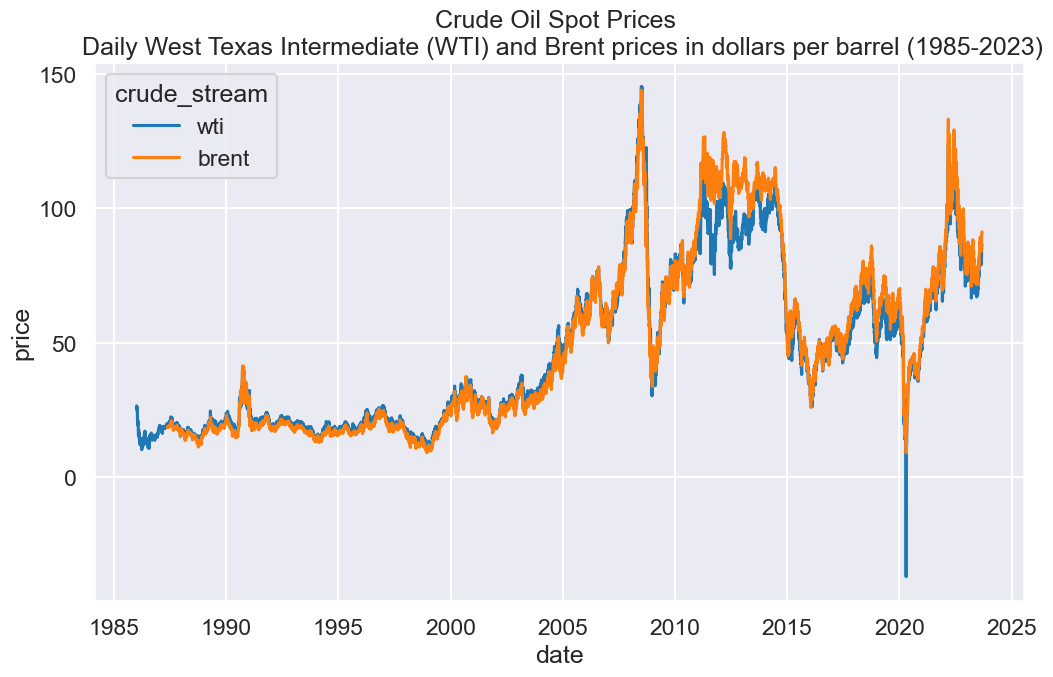

In [3]:
# Use Seaborn themes and grids
sns.set_style("darkgrid")
sns.set_context("talk")

# Set figure size
plt.figure(figsize=(12,7))

# Set y-ticks for every 50 units
plt.yticks([0, 50, 100, 150])

sns.lineplot(data=price_data, x='date', y='price', hue='crude_stream')
plt.title('Crude Oil Spot Prices \n Daily West Texas Intermediate (WTI) and Brent prices in dollars per barrel (1985-2023)')

plt.show()

#### Final Crude Oil Spot Prices Graph

In [4]:
# Clean NA data points
price_data = price_data.dropna(subset=['price'])

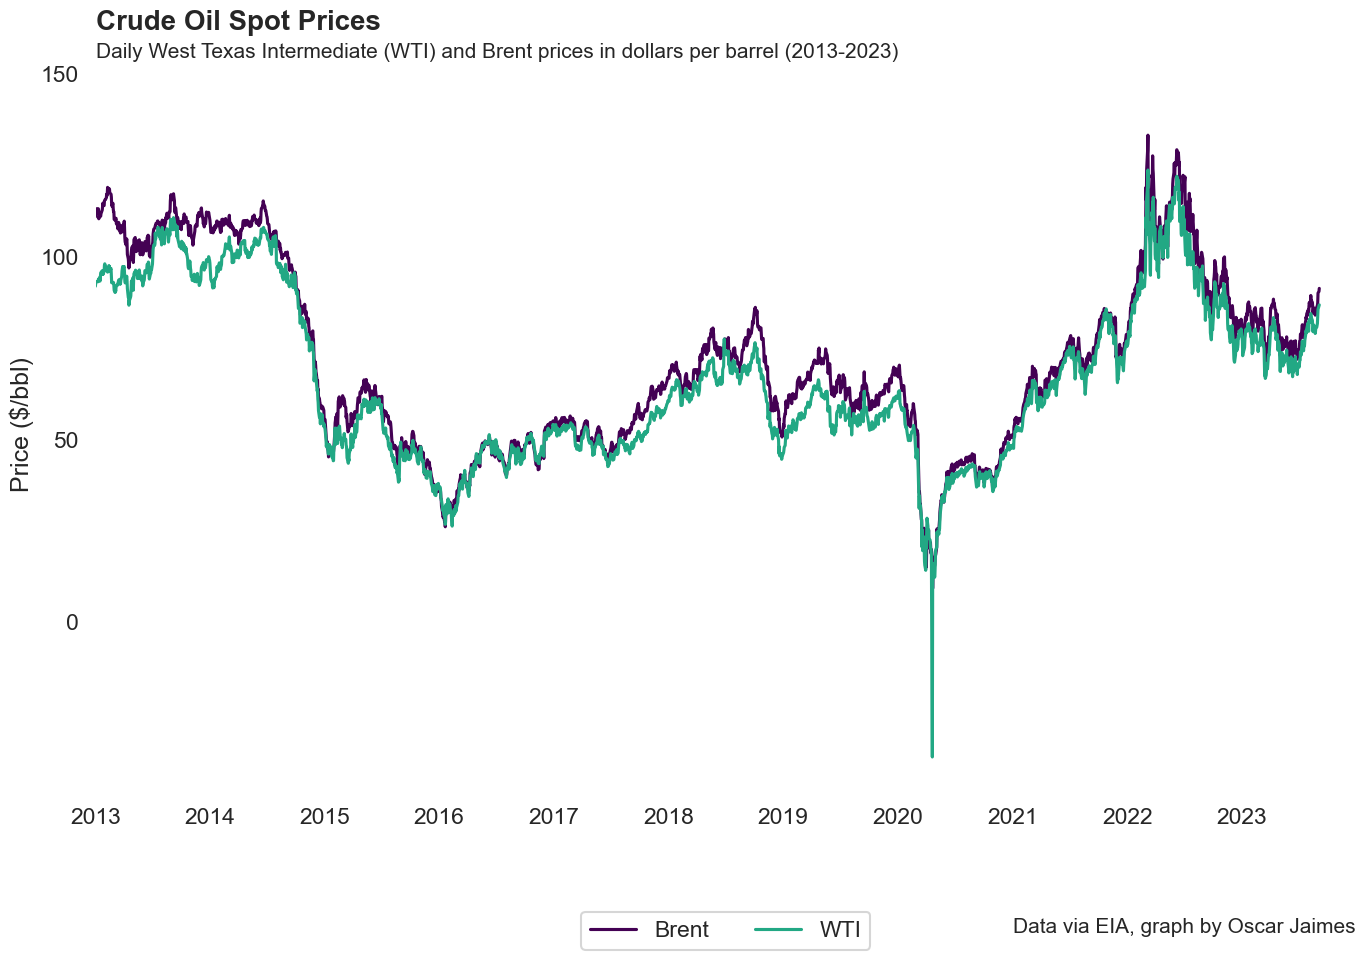

In [11]:
# Use whitegrid theme
sns.set_style("white")

# Colour palette
viridis = plt.cm.get_cmap('viridis', 256)
aqua = viridis(0.60)
black = viridis(0.00)
custom_palette = [black, aqua]

# Set figure size
plt.figure(figsize=(14,10))

# Line Plot Config
sns.lineplot(
  data=price_data,
  x='date',
  y='price',
  hue='crude_stream',
  hue_order=['brent', 'wti'],
  palette=custom_palette
)

# x-Axis constraints
plt.gca().set_xlim([datetime(2013, 1, 1), datetime(2023, 12, 31)])

# y-Axis constraints
plt.yticks([0, 50, 100, 150])

# Title Styling
plt.title("Crude Oil Spot Prices", loc='left', fontsize=20, weight='bold', pad=20)
plt.text(
  s='Daily West Texas Intermediate (WTI) and Brent prices in dollars per barrel (2013-2023)', 
  x=0,
  y=1.00,
  fontsize=15,
  ha='left',
  transform=plt.gca().transAxes
)

# Axis Labels
plt.ylabel('Price ($/bbl)')
plt.xlabel('')

# Legend Stlying
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Modify the legend labels
labels = ['Brent', 'WTI']
for t, label in zip(legend.texts, labels): 
    t.set_text(label)

# Despine for cleaner look
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Source & Name
plt.text(
  x=1,
  y=-0.2,
  s='Data via EIA, graph by Oscar Jaimes',
  transform=plt.gca().transAxes, 
  ha='right',
  va='bottom',
  fontsize=15
)

plt.show()